In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import re, os

In [2]:
# 
# Plot training curves within the directory specified below.
# Note: The directory specified below must contain directories of models which have a eval_results.txt file
#
grid_search_dir = 'gridsearch-seqlen-vs-learningrate'
model_dirs = os.listdir(grid_search_dir)

In [15]:
def parse_line(s):
    """Returns epoch and validation accuracy"""
    m = re.match(r"Epoch (\d+): Validation Accuracy=([0-9]*\.?[0-9]+)", s)
    if m:
        groups = m.groups()
        epoch, validation = groups
        return int(epoch), float(validation)
    
def get_plot_title(directory_name):
    """Returns the plot title for a given directory name"""
    m = re.match(r"^(bert-[^_]*)_([^_]*)_([^_]*)_([^_]*)$", directory_name)
    if m:
        groups = m.groups()
        bert_model, max_seq_len, learning_rate, num_train_epochs = groups
        return f'{bert_model} with max_seq_len={max_seq_len} learning_rate={learning_rate} for {num_train_epochs} epochs'
    return f'Error: Could not parse {directory_name}'

def get_data(fp):
    """Get all data from a file"""
    epochs = []
    validations = []
    for line in fp:
        if parse_line(line):
            epoch, validation = parse_line(line)
            epochs.append(epoch)
            validations.append(validation)
    return epochs, validations
    
def create_plots(model_dirs):
    for directory in model_dirs:
        current_path = os.path.join(grid_search_dir, directory)
        for f in os.listdir(current_path):
            if f.endswith("results.txt"):
                data_path = os.path.join(current_path, f)
                with open(data_path, 'r') as fp:
                    X, Y = get_data(fp)
                    
                    if len(Y) == 0:
                        print(f'Incomplete data file at {data_path}')
                        continue
                        
                    fig = plt.figure()
                    plt.plot(X,Y)
                    fig.suptitle(get_plot_title(directory))
                    plt.xlabel('Epoch')
                    plt.ylabel('Validation Accuracy')
                    plt.figtext(1.3, .5, f'Final Accuracy = {Y[-1]}', size='x-large')
                    

Incomplete data file at gridsearch-seqlen-vs-learningrate/bert-large-uncased_500_1.5000000000000002e-05_100/eval_results.txt
Incomplete data file at gridsearch-seqlen-vs-learningrate/bert-large-uncased_500_1e-05_100/eval_results.txt
Incomplete data file at gridsearch-seqlen-vs-learningrate/bert-large-uncased_500_5e-06_100/eval_results.txt


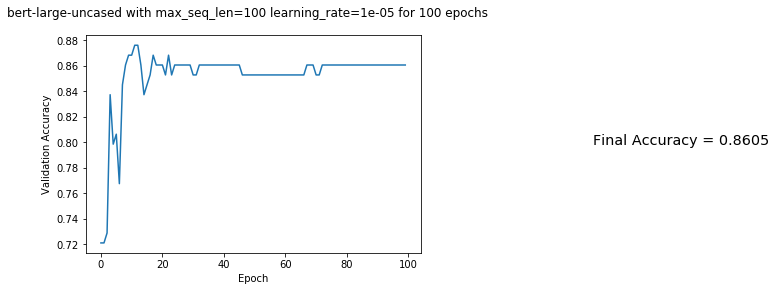

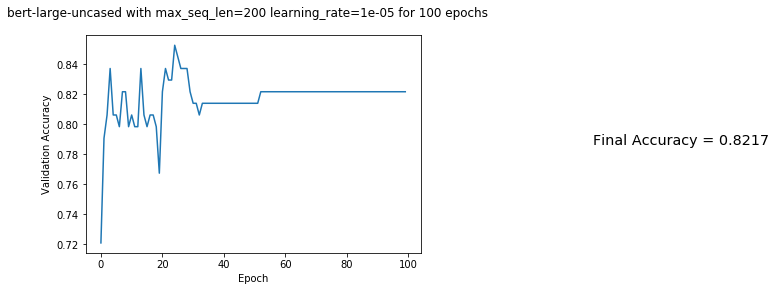

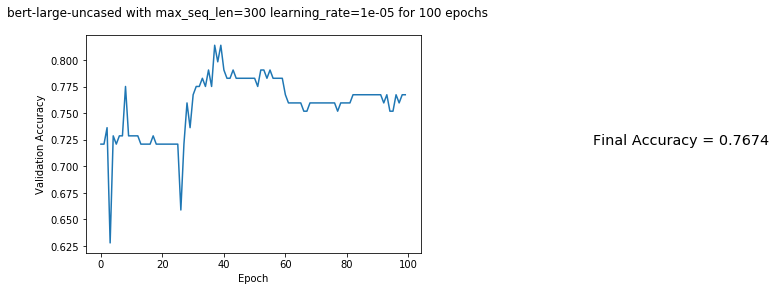

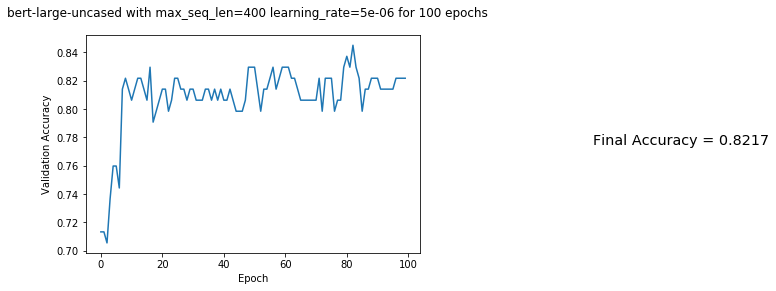

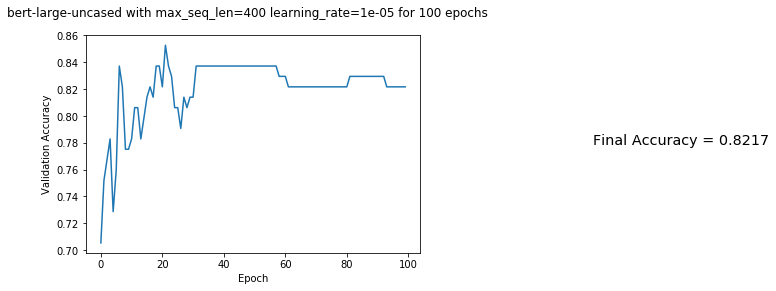

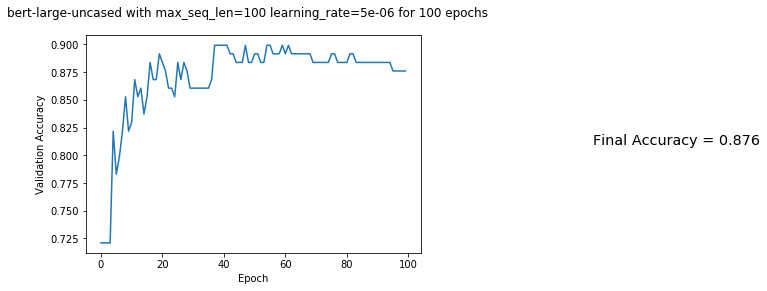

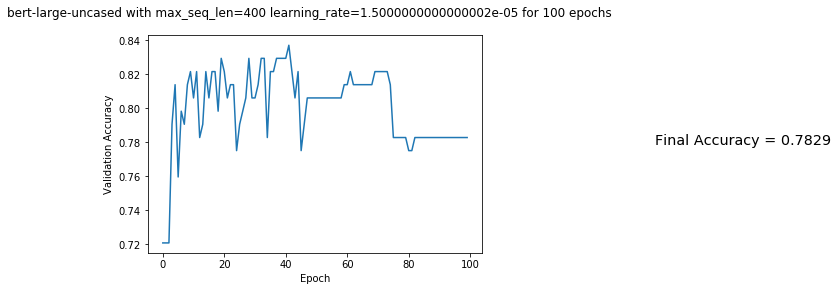

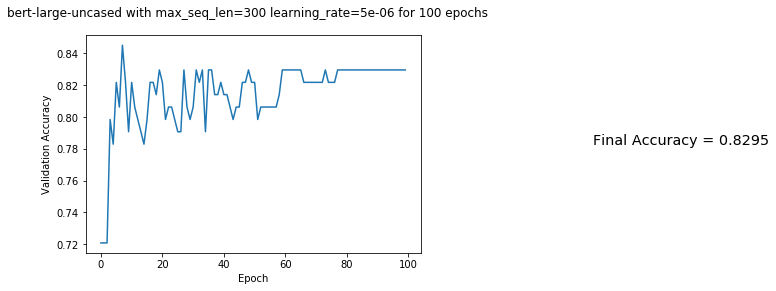

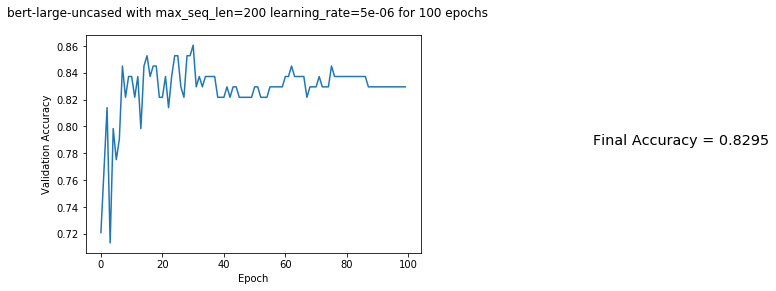

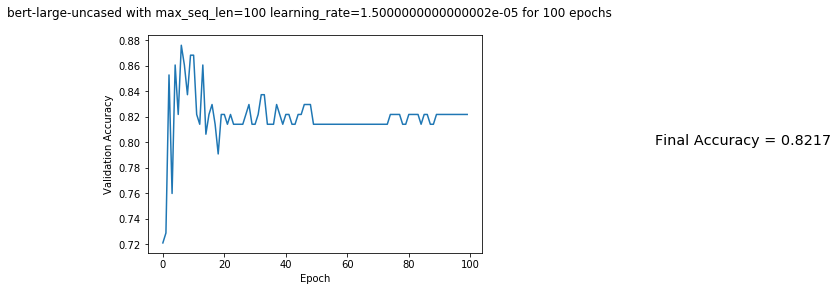

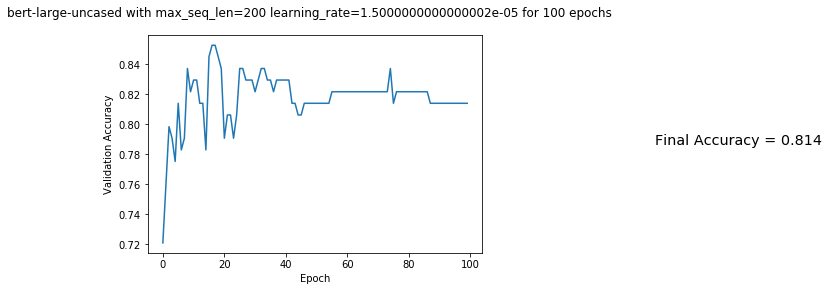

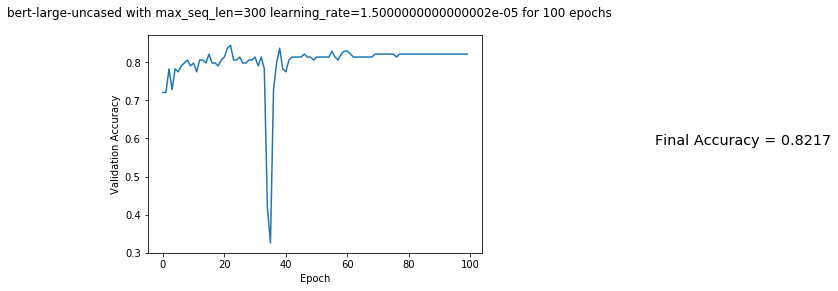

In [16]:
create_plots(model_dirs)